In [1]:
# program to read, check & repair smartdata file with errors
# the new repaired smartdata is written to standard text file
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import json
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the json file into 'data' array
with open('temp.json') as f:
    data = json.load(f)

# print values at end of the dataset
last = len(data["values"])-1 # starting zero
print 'last index = ',last
print 'last json timestamps',data["timestamps"][last]
print 'last json values    ',data["values"][last]

last index =  56528
last json timestamps 2018-05-29T11:59:13Z
last json values     157484.4


In [3]:
# move data into seperate arrays and
# convert to standard datetime format
dates = []
value = []
for i in range(0,last+1):
    dates.append(datetime.datetime.strptime(data["timestamps"][i], '%Y-%m-%dT%H:%M:%SZ'))
    value.append(data["values"][i])

# check last values same as above
print 'check last dates[]  ',dates[last]
print 'check last value[]  ',value[last]

check last dates[]   2018-05-29 11:59:13
check last value[]   157484.4


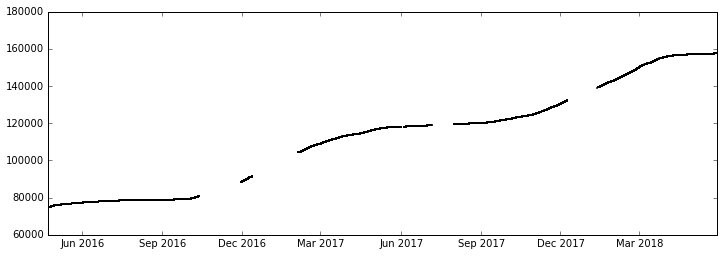

In [4]:
# scatter plot the original data to look for gaps and errors
fig,ax = plt.subplots(figsize=(12,4))
plt.scatter(dates,value,marker=".",s=1,color='black')
xmin = dates[0]
xmax = dates[last]
plt.xlim([xmin,xmax])
plt.show()

In [5]:
# new array for data insertion
newdates = [] 
newvalue = []
# save added values seperately for checking in gnuplot
repdates = [] 
repvalue = []

# loop through the time data and look for 
# gaps greater than maxgapsize and repair 
# and copy existing data to the new arrays
for i in range(1,last+1):
    # copy original values to newdata
    newdates.append(dates[i-1])
    newvalue.append(value[i-1])
    # define deltatime and deltavalue
    dt = dates[i]-dates[i-1]
    dv = value[i]-value[i-1]
    # change maxgapsize to (days=2) for example to fix only large gaps
    maxgapsize = timedelta(minutes = 16) # user specified max gap size
    tincrement = timedelta(minutes = 15) # time steps used to fill gap

    # if there is a gap in the time data,
    # calc how many data points to insert
    if dt > maxgapsize:
        percent = int(float(i)*100/last) # position in data file
        dtdays  = float(dt.days)
        dthours = float(dt.seconds)/3600
        numgaps = float(dtdays*24*4 + dthours*4 - 1) # number of 15min intervals
        numgaps = int(round(numgaps,0)) #round up/down to nearest integer
        print "at",percent,"%",dtdays,"days",dthours,"hours",numgaps,"gaps"  

        # error check
        if numgaps < 1:
            sys.exit("error: numgaps < 1")
        
        # fill in the missing data
        for gap in range(0,numgaps):
            newdates.append(newdates[-1] + tincrement)
            newvalue.append(newvalue[-1] + dv/float(numgaps+1))
            repdates.append(newdates[-1])
            repvalue.append(newvalue[-1])
            #print "debug",newdates[-1],newvalue[-1]

at 0 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.75 hours 2 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 1.0 hours 3 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 1 % 0.0 days 0.5 hours 1 gaps
at 2 % 0.0 days 0.500555555556 hours 1 gaps
at 3 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 0.5 hours 1 gaps
at 4 % 0.0 days 1.0 hours 3 gaps
at 4 % 0.0 days 0.5 hours 1 gap

at 85 % 0.0 days 0.5 hours 1 gaps
at 85 % 0.0 days 0.499444444444 hours 1 gaps
at 85 % 0.0 days 0.749166666667 hours 2 gaps
at 85 % 0.0 days 0.500833333333 hours 1 gaps
at 85 % 0.0 days 0.497777777778 hours 1 gaps
at 85 % 0.0 days 0.499722222222 hours 1 gaps
at 86 % 0.0 days 0.500277777778 hours 1 gaps
at 86 % 0.0 days 0.502222222222 hours 1 gaps
at 86 % 0.0 days 0.500277777778 hours 1 gaps
at 86 % 0.0 days 1.0 hours 3 gaps
at 86 % 0.0 days 0.5 hours 1 gaps
at 86 % 0.0 days 0.748055555556 hours 2 gaps
at 86 % 0.0 days 0.5 hours 1 gaps
at 86 % 0.0 days 0.500277777778 hours 1 gaps
at 86 % 0.0 days 0.499722222222 hours 1 gaps
at 86 % 0.0 days 0.5 hours 1 gaps
at 86 % 0.0 days 0.75 hours 2 gaps
at 88 % 0.0 days 0.502222222222 hours 1 gaps
at 88 % 0.0 days 2.25 hours 8 gaps
at 88 % 0.0 days 0.5 hours 1 gaps
at 88 % 0.0 days 0.500277777778 hours 1 gaps
at 88 % 0.0 days 0.500277777778 hours 1 gaps
at 88 % 0.0 days 0.5 hours 1 gaps
at 88 % 0.0 days 1.00055555556 hours 3 gaps
at 88 % 0.0 days 3

In [6]:
# summary of the points added
newlast = len(newdates)-1 # (starting at zero)
print "old last index =",last
print "new last index =",newlast
print "num gaps added =",newlast-last

old last index = 56528
new last index = 73631
num gaps added = 17103


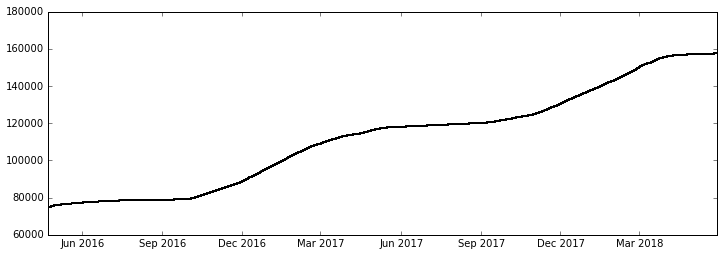

In [7]:
# scatter plot the repaired dataset
fig,ax = plt.subplots(figsize=(12,4))
plt.scatter(newdates,newvalue,marker=".",s=1,color='black')
xmin = newdates[0]       # to inspect
xmax = newdates[newlast] # to inspect
plt.xlim([xmin,xmax])
plt.show()

In [8]:
# double check first/last points consistent
print 'check first values:'
print data["values"][0]
print value[0]
print newvalue[0]

print 'check last values:'
print data["values"][last]
print value[last]
print newvalue[newlast]

check first values:
74707.5
74707.5
74707.5
check last values:
157484.4
157484.4
157484.4


In [9]:
#search new data for max gap size (should be < 16min)
maxgapsize = timedelta(minutes = 1)
maxgapiloc = 0
for i in range(1,newlast+1):
    dt = newdates[i]-newdates[i-1]
    if dt > maxgapsize:
        maxgapsize = dt
        maxgapiloc = i

print "maxgapsize =",maxgapsize,"(hour:min:sec) at i =",maxgapiloc,'/',newlast

maxgapsize = 0:15:50 (hour:min:sec) at i = 62864 / 73631


In [10]:
# write data to text files for (gnuplot) inspection
print "writing repaired_full..."
file = open('repaired_full.dat','w') 
for i in range(0,newlast+1):
    dstr = newdates[i].strftime('%d/%m/%y %H:%M:%S')
    line = dstr + " " + str(newvalue[i])
    file.write(str(line)+'\n') 
file.close() 
print "writing done"

writing repaired_full...
writing done


In [11]:
print "writing repaired_only..."
replast = len(repdates)-1 # starting zero
file = open('repaired_only.dat','w') 
for i in range(0,replast+1):
    dstr = repdates[i].strftime('%d/%m/%y %H:%M:%S')
    line = dstr + " " + str(repvalue[i])
    file.write(str(line)+'\n') 
file.close() 
print "writing done"

writing repaired_only...
writing done


In [12]:
print "writing original_only..."
file = open('original_only.dat','w') 
for i in range(0,last+1):
    dstr = dates[i].strftime('%d/%m/%y %H:%M:%S')
    line = dstr + " " + str(value[i])
    file.write(str(line)+'\n') 
file.close() 
print "writing done"

writing original_only...
writing done


<img style="float:left" src="sample_gnuplot1.png" width="400">

<img style="float:left" src="sample_gnuplot2.png" width="400">

<img style="float:left" src="sample_gnuplot3.png" width="400">